In [2]:
import pandas as pd
from graphviz import Digraph

node_map = {
    'a': 'process', 'b': 'thread', 'c': 'file',
    'd': 'MAP_ANONYMOUS', 'e': 'NA', 'f': 'stdin',
    'g': 'stdout', 'h': 'stderr',
}

edge_map = {
    'i': 'accept', 'j': 'access', 'k': 'bind',
    'l': 'chmod', 'm': 'clone', 'n': 'close',
    'o': 'connect', 'p': 'execve', 'q': 'fstat',
    'r': 'ftruncate', 's': 'listen', 't': 'mmap2',
    'u': 'open', 'v': 'read', 'w': 'recv',
    'x': 'recvfrom', 'y': 'recvmsg', 'z': 'send',
    'A': 'sendmsg', 'B': 'sendto', 'C': 'stat',
    'D': 'truncate', 'E': 'unlink', 'F': 'waitpid',
    'G': 'write', 'H': 'writev'
}

data_all_graph = pd.read_csv(
    "../data/streamspot/all.tsv", sep='\t', header=None,
    names=['Src_Id', 'Src_Type', 'Dst_Id', 'Dst_Type', 'Edge_Type', 'G_Id']
)

src_nodes = []
dst_nodes = []
links = []

draw_graph = data_all_graph[data_all_graph['G_Id'] == 0]
for i in range(len(draw_graph)):
    if node_map[draw_graph['Src_Type'][i]] not in src_nodes:
        src_nodes.append(node_map[draw_graph['Src_Type'][i]])
    if node_map[draw_graph['Dst_Type'][i]] not in dst_nodes:
        dst_nodes.append(node_map[draw_graph['Dst_Type'][i]])
    if {"source": node_map[draw_graph['Src_Type'][i]], "target": node_map[draw_graph['Dst_Type'][i]], "value": edge_map[draw_graph['Edge_Type'][i]]} not in links:
        links.append({"source": node_map[draw_graph['Src_Type'][i]], "target": node_map[draw_graph['Dst_Type'][i]], "value": edge_map[draw_graph['Edge_Type'][i]]})

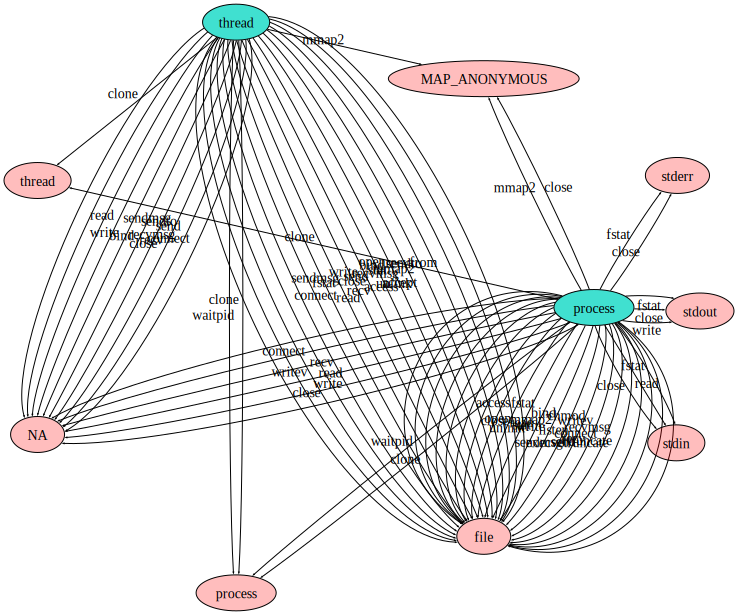

In [50]:
from graphviz import Digraph

g = Digraph(engine = 'circo')# circo dot fdp neato nop nop1 nop2 osage patchwork sfdp twopi

src_node_map = {name: str(idx) for idx, name in enumerate(src_nodes)}
dst_node_map = {name: str(idx + len(src_node_map)) for idx, name in enumerate(dst_nodes)}

for node in src_nodes:
    # g.node(src_node_map[node], node)
    g.node(src_node_map[node], node, style = 'filled', fillcolor = '#40e0d0')
for node in dst_nodes:
    # g.node(dst_node_map[node], node)
    g.node(dst_node_map[node], node, style = 'filled', fillcolor = '#ff000042')

for link in links:
    g.edge(src_node_map[link["source"]], dst_node_map[link["target"]], link["value"])

g.edge_attr.update(arrowsize = '0.1')

g.attr(size = "1500, 1500")
g.attr(fontsize = '100')

g

# dot.attr(nodesep = '0.1')
# dot.attr(ranksep = '10')
# dot.unflatten(stagger = 3)


In [ ]:
'''from pyecharts import options as opts
from pyecharts.charts import Graph
from pyecharts.render import make_snapshot
from snapshot_selenium import snapshot

init_opts = opts.InitOpts(
    renderer="canvas",# 渲染模式svg或canvas
    bg_color="white"# 图的背景颜色
)


nodes = nodes[0:2]
links = links[0:5]
curve = 1
for i in links:
    i["curveness"] = curve
    curve += 1

print(nodes, links)

g = (
    Graph(init_opts).add(
        "",
        nodes,# 节点的数据集，存储节点的名称
        links,# 连接数据集，存储节点之间的连接信息
        repulsion = 3000,# 节点的斥力因子
        edge_label = opts.LabelOpts(is_show = True, position = "middle", formatter = "{c}"),
        # is_draggable = True,# 节点是否可拖拽
        # symbol_size = 20,# 关系图节点的大小
        # is_layout_animation = True,# 在浏览器端节点数据较多（>100）的时候不建议关闭，布局过程会造成浏览器假死
        # linestyle_opts = opts.LineStyleOpts(curve=0.2),# 关系边的线条样式
        # edge_symbol = ['circle', 'arrow'],# 设置标记为箭头
        # edge_symbol_size = 7,# 设置标记的大小
        # label_opts = opts.LabelOpts(is_show=True),# 是否显示图例
    ).set_global_opts(
        title_opts = opts.TitleOpts(
            title = "StreamSpot Graph",
            title_textstyle_opts=opts.TextStyleOpts(
                font_size = 20,  # 设置标题字体的大小
                font_weight = "bold"  # 文字字体的粗细，可选：'normal'，'bold'，'bolder'，'lighter'
            )
        )
    ).set_series_opts(
        # 标签配置项
        label_opts = opts.LabelOpts(
            is_show = True,  # 是否显示标签
            position = "top",  # 标签的位置。可选
            color = 'black',  # 文字的颜色。如果设置为 'auto'，则为视觉映射得到的颜色，如系列色。
            font_size = 15,  # 文字的字体大小
            font_style = 'normal',  # 文字字体的风格，可选：'normal'，'italic'，'oblique'
            font_weight = 'bold'  # 文字字体的粗细，可选：'normal'，'bold'，'bolder'，'lighter'
        ),
        # 提示框配置项
        tooltip_opts=opts.TooltipOpts(
            is_show = True,# 是否显示提示框组件，包括提示框浮层和 axisPointer。
            # 指示器类型。可选
            # 'line'：直线指示器
            # 'shadow'：阴影指示器
            # 'none'：无指示器
            # 'cross'：十字准星指示器。其实是种简写，表示启用两个正交的轴的 axisPointer。
            axis_pointer_type="line",
            border_width=2,  # 设置边框宽度
            # formatter="{a}<br/>{b}<br/>{c}",  # 设置提示框内数据展示的格式
            textstyle_opts=opts.TextStyleOpts(font_size=10)  # 设置提示框内字体的大小
        ),
        # 算法配置项（可以设置整体的节点权重和边的权重分布）
        force_atlas2_opts = opts.GraphGLForceAtlas2Opts(
            is_gpu = True,# 是否启用 GPU 布局
            # 一次更新的迭代次数。因为力引导算法通常会把每次迭代的结果都绘制出来
            # 但是因为绘制时间往往会大于布局的时间，会导致布局的效率降低
            # 这时候我们可以设置更大的steps参数，保证布局和绘制的时间均衡，加快布局的速度
            steps=50,
            is_repulsion_by_degree = True,  # 是否根据节点边的数量来计算节点的斥力因子，建议开启
            is_prevent_overlap = True  # 是否开启防止节点重叠
        )
    )
)

# 生成图片格式，并保存在本地
make_snapshot(
    engine = snapshot,# 渲染引擎
    file_name = 'render.html',# 传入HTML文件路径
    output_name = 'streamspot graph.png',# 输出图片路径
    delay = 2,# 延迟时间，避免图还没渲染完成就生成图片，造成图片不完整
    pixel_ratio = 5,# 像素比例，用于调节图片质量
    is_remove_html = True# 渲染完图片是否删除原HTML文件
)

# 将关系图配置转换为JSON格式
# graph_data = g.dump_options_with_quotes()

g.render_notebook()'''